<center><h1> Project 01: How fast can you high five before you damage your hand? </h1>
<h2>PHYS 210 </h2>
<h3>Andrea Schildhorn </h3></center>


# Introduction
This notebook investigates the *age-old* question: "How fast does a high-five need to be in order to cause damage to the human hand?" By exploring the forces, momenta, and impulses involved in the collision of two hands, we aim to understand the conditions under which a high-five could result in breaking a bone in the hand. Through this investigation, we aim to provide a nuanced understanding of the dynamics of a high-five and the physical conditions that might lead to injury. This research not only quantifies the forces at play but also highlights the role of individual differences in physiology, offering insights into the mechanics of a quintessential human practice.

---

### Assumptions

1. **Mass of the Hands**:  
   The mass of a human hand can vary significantly depending on factors such as gender, body size, and composition. For simplicity, this simulation uses the average mass of an adult male's hand<sup>[[5]](https://www.cell.com/current-biology/fulltext/S0960-9822(23)00673-5)</sup>:  
   $$m_1 = m_2 = 0.4 \, \text{kg}.$$
   
3. **Fracture Force**:  
   The force required to fracture the bones in a human hand is assumed to be<sup>[[3]](https://www.ircobi.org/wordpress/downloads/irc12/pdf_files/59.pdf)</sup>:  
   $$F_{\text{fracture}} = 3300 \, \text{N}.$$
   
4. **Collision Elasticity**:  
   The collision between the two hands is approximated as an **imperfectly elastic collision**, with a coefficient of restitution:  
   $$e = 0.8.$$  
   This value reflects the behavior of materials like soccer balls<sup>[[7]](https://www.physics.hku.hk/phys1055/lectures/chap05.html#::text=For%20a%20typical%20soccer%20ball,by%2020%25%20after%20the%20impact.)</sup>, which are soft yet firm, providing a reasonable analogy for hand collisions. While not a perfect match, it captures the key characteristics of partial energy loss during impact.

5. **Neglecting Gravity**:  
   The effect of gravity is considered negligible for this simulation. Since the interaction occurs over a short time and primarily involves horizontal motion, gravity does not significantly influence the dynamics of the high-five.

6. **Initial Conditions**:  
   Both hands start at rest and are initially separated by a fixed distance. This setup reflects the mechanics of a typical high-five motion, where the hands accelerate toward each other from a stationary position.



### Constants

| **Parameter**         | **Value**                          | **Explanation**                                                                                           |
|------------------------|------------------------------------|-----------------------------------------------------------------------------------------------------------|
| $l$                   | $0.25 \, \text{m}$                | Length of the forearms.                                                                                   |
| $m_1, m_2$            | $0.4 \, \text{kg}$                | Mass of each hand (average male adult).                                                                   |
| $\theta_1^0$          | $\frac{3\pi}{4} \, \text{rad}$    | Initial angle of Hand 1.                                                                                  |
| $\theta_2^0$          | $-\frac{3\pi}{4} \, \text{rad}$   | Initial angle of Hand 2.                                                                                  |
| $e$                   | $0.8$                             | Coefficient of restitution (imperfectly elastic collision).                                               |
| $\Delta t$            | $0.001 \, \text{s}$               | Time step for the simulation, chosen for precision and stability after testing multiple values.            |
| $T$                   | $1.0 \, \text{s}$                 | Total simulation time, sufficient to capture high-five dynamics.                                          |
| $d$                   | $0.25 \, \text{m}$                | Horizontal distance between the pendulum origins (shoulder width approximation).                          |
| $\text{Tolerance}$    | $1 \times 10^{-2}$                | Maximum distance allowed between hands for collision detected.|
| $\text{Max acceleration}$ | $343 \, \text{m/s}^2$             | Maximum acceleration during the motion, equivalent to $35 \times 9.8 \, \text{m/s}^2$ (max acceleration human body can sustain for a small period<sup>[[8]](https://en.wikipedia.org/wiki/G-force#cite_note-Brulle-8)</sup>.)                    |


**Justifications for arbitrary parameters:**
- **$\Delta t = 0.001 \, \text{s}$**:  
  Time step for the simulation. This value was chosen after testing multiple values for $\Delta t$. It provides sufficient precision to resolve the dynamics accurately without making the timestep so small that it causes stability or computational issues in the simulation.

- **$T = 1.0 \, \text{s}$**:  
  Total simulation time. Since the system involves short distances and high accelerations, a longer simulation time is unnecessary. One second is sufficient to capture the high-five dynamics and collision behavior.

- **$\text{Tolerance} = 1 \times 10^{-2}$**:  
  The collision detection tolerance was determined after multiple tests with the simulation. If the tolerance is too small, collisions may not be detected due to the finite resolution of the simulation steps. Conversely, if the tolerance is too large, collisions could be detected prematurely, before they physically occur. This value balances these trade-offs for accurate detection.

# Simulation 1 - Determining velocity from fixed mass and length

In this simulation, we model two fixed highfivers as pendulums that start at their maximum displacement, symmetric across the vertical axis. The pendulums’ masses represent the mass of a hand, and the lengths of the strings represent the lengths of the high-fivers' forearms. This model was chosen because it effectively emulates a rotational collision around fixed pivot points, which, in our scenario, correspond to the elbows of the high-fivers.

This approach allows us to capture the dynamics of rotational motion, such as angular velocity and momentum, which are critical in understanding how energy and forces behave during the collision. By using pendulums, we simplify the problem into a two-dimensional system, while still maintaining physical accuracy for the scenario. Additionally, the pendulum setup provides a straightforward way to incorporate important factors like angular acceleration, tangential velocity, and collisions, making it a robust and efficient approximation for this type of interaction.

First, we import any libraries and assign any constants.

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Constants
l = 0.25  # Length of arm (m)
d = 0.25  # Horizontal distance between pendulum origins (m)
m1 = 0.4  # Mass of pendulum 1 (kg)
m2 = 0.4  # Mass of pendulum 2 (kg)
e = 0.8  # Coefficient of restitution
theta1_0 = 3 * np.pi / 4  # Initial angle of mass 1 (radians)
theta2_0 = -3 * np.pi / 4  # Initial angle of mass 2 (radians)
max_acceleration = 9.8 * 35 # m/s^2

dt = 0.001  # Time step (s)
T = 1  # Maximum simulation time (s)
steps = int(T / dt)  # Number of simulation steps
tolerance = 1e-2  # Tolerance for detecting a return to the initial separation
initial_accelerations = np.linspace(0.1, max_acceleration, 100)
collision_forces, max_velocities = [], []

Then, we run our simulation. 

From rest, the final velocity required to break both hands is 9.22 m/s!


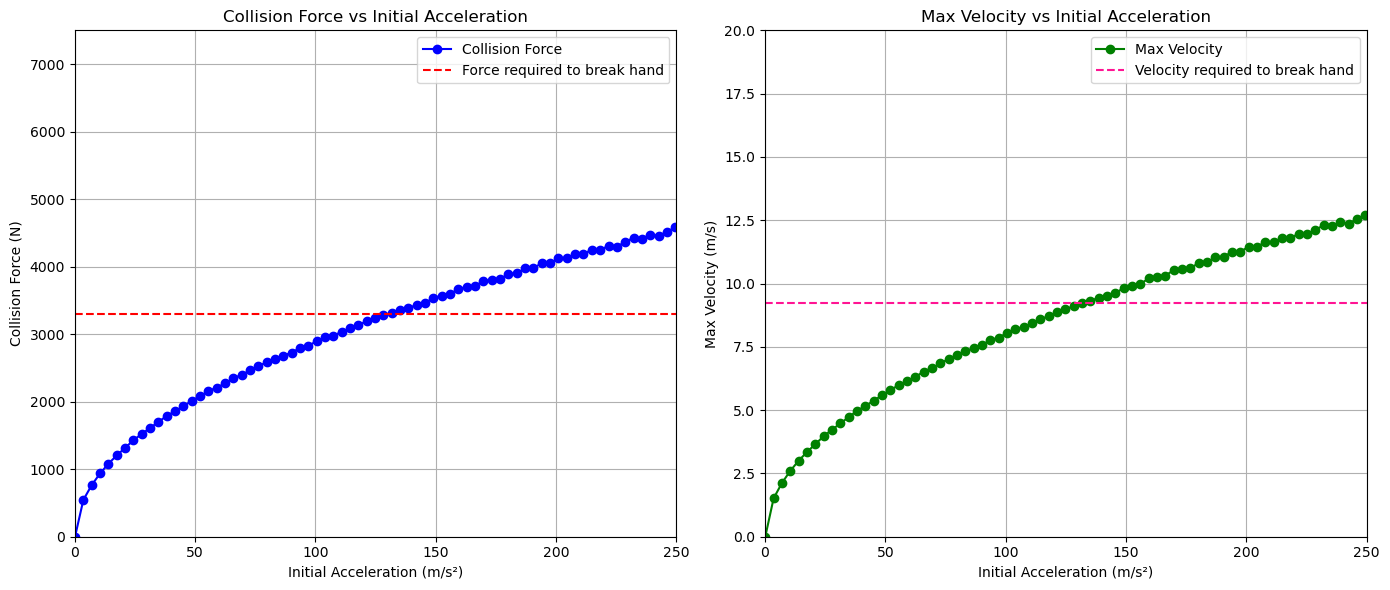

In [2]:
collision_forces, max_velocities = [], []

# Looping through each acceleration
for a0 in initial_accelerations:
    # Initialization
    omega1, omega2 = 0, 0  # Start with zero angular velocity
    theta1, theta2 = theta1_0, theta2_0
    collision_detected = False
    collision_force = 0  # Default value if no collision occurs
    max_velocity = 0  # Default value before a collision is detected

    # Simulation
    for step in range(steps):
        # Angular accelerations from tangential accelerations
        alpha1 = a0 / l
        alpha2 = -a0 / l

        # Update angular velocities and positions
        omega1 += alpha1 * dt
        omega2 += alpha2 * dt
        theta1 += omega1 * dt
        theta2 += omega2 * dt

        # Calculate positions
        x1 = d / 2 + l * np.sin(theta1)
        y1 = -l * np.cos(theta1)
        x2 = -d / 2 + l * np.sin(theta2)
        y2 = -l * np.cos(theta2)

        # Compute separation
        separation = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

        # Detect collision
        if not collision_detected and separation < 1e-2:
            collision_detected = True

            # Calculate velocities before collision
            v1_initial = omega1 * l
            v2_initial = omega2 * l

            # Apply restitution to calculate final velocities
            v1_final = ((m1 - e * m2) * v1_initial + (1 + e) * m2 * v2_initial) / (m1 + m2)
            v2_final = ((m2 - e * m1) * v2_initial + (1 + e) * m1 * v1_initial) / (m1 + m2)

            # Momentum changes
            delta_p1 = m1 * l * (v1_final - v1_initial)
            delta_p2 = m2 * l * (v2_final - v2_initial)

            # Net momentum change
            delta_p_total = abs(delta_p1) + abs(delta_p2)

            # Approximate collision force
            collision_duration = max(dt, 1e-4)  # Avoid division by zero
            collision_force = delta_p_total / collision_duration
            
            # Update maximum velocity
            max_velocity = max(abs(v1_initial), abs(v2_initial))
            if abs(collision_force - 3300) < 20:
                print(f"From rest, the final velocity required to break both hands is {max_velocity:.3g} m/s!")

        # Stop when pendulums return to initial positions
        if collision_detected and abs(theta1 - theta1_0) < tolerance and abs(theta2 - theta2_0) < tolerance:
            break

    # Store results
    collision_forces.append(collision_force)
    max_velocities.append(max_velocity)

# Convert results to arrays
collision_forces = np.array(collision_forces)
max_velocities = np.array(max_velocities)

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Collision Force Plot
axes[0].plot(initial_accelerations, collision_forces, 'o-', label="Collision Force", color="blue")
axes[0].axhline(y=3300, color='red', linestyle='--', label="Force required to break hand")
axes[0].set_title("Collision Force vs Initial Acceleration")
axes[0].set_xlabel("Initial Acceleration (m/s²)")
axes[0].set_ylabel("Collision Force (N)")
axes[0].set_xlim(0, 250)
axes[0].set_ylim(0, 7500)
axes[0].grid()
axes[0].legend()

# Max Velocity Plot
axes[1].plot(initial_accelerations, max_velocities, 'o-', label="Max Velocity", color="green")
axes[1].axhline(y=9.22, color='#FF1493', linestyle='--', label="Velocity required to break hand")
axes[1].set_title("Max Velocity vs Initial Acceleration")
axes[1].set_xlabel("Initial Acceleration (m/s²)")
axes[1].set_ylabel("Max Velocity (m/s)")
axes[1].set_xlim(0, 250)
axes[1].set_ylim(0, 20)
axes[1].grid()
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Simulation 2 - Exploring different anatomies
We will continue with our stationary high-fivers. Given the philosophical weight of our research question, it is important to account for as many possibilities as possible to ensure a comprehensive analysis. Specifically, we introduce variability in the mass of the hand and the length of the forearm to reflect differences in human anatomy, such as variations in body composition, muscle mass, and bone structure.

These parameters are critical because they directly affect the dynamics of the high-five. The mass of the hand is a key determinant of the momentum transfer during the collision, influencing the force exerted and the risk of injury. Similarly, the forearm length governs the leverage and angular motion of the arm, which in turn impacts the maximum tangential velocity of the hand at the point of impact. Together, these factors define the mechanical efficiency and potential energy dissipation during the high-five interaction. To ensure realism, we restrict our analysis to values of mass and length within the range typically observed in human physiology. Specifically, we do not evaluate values of hand mass or forearm length greater than $0.8 kg$ or $0.5 m$, as such values are outside the bounds of normal human variation. Furthermore, these values are the same as our last simulation but multiplied by 2.

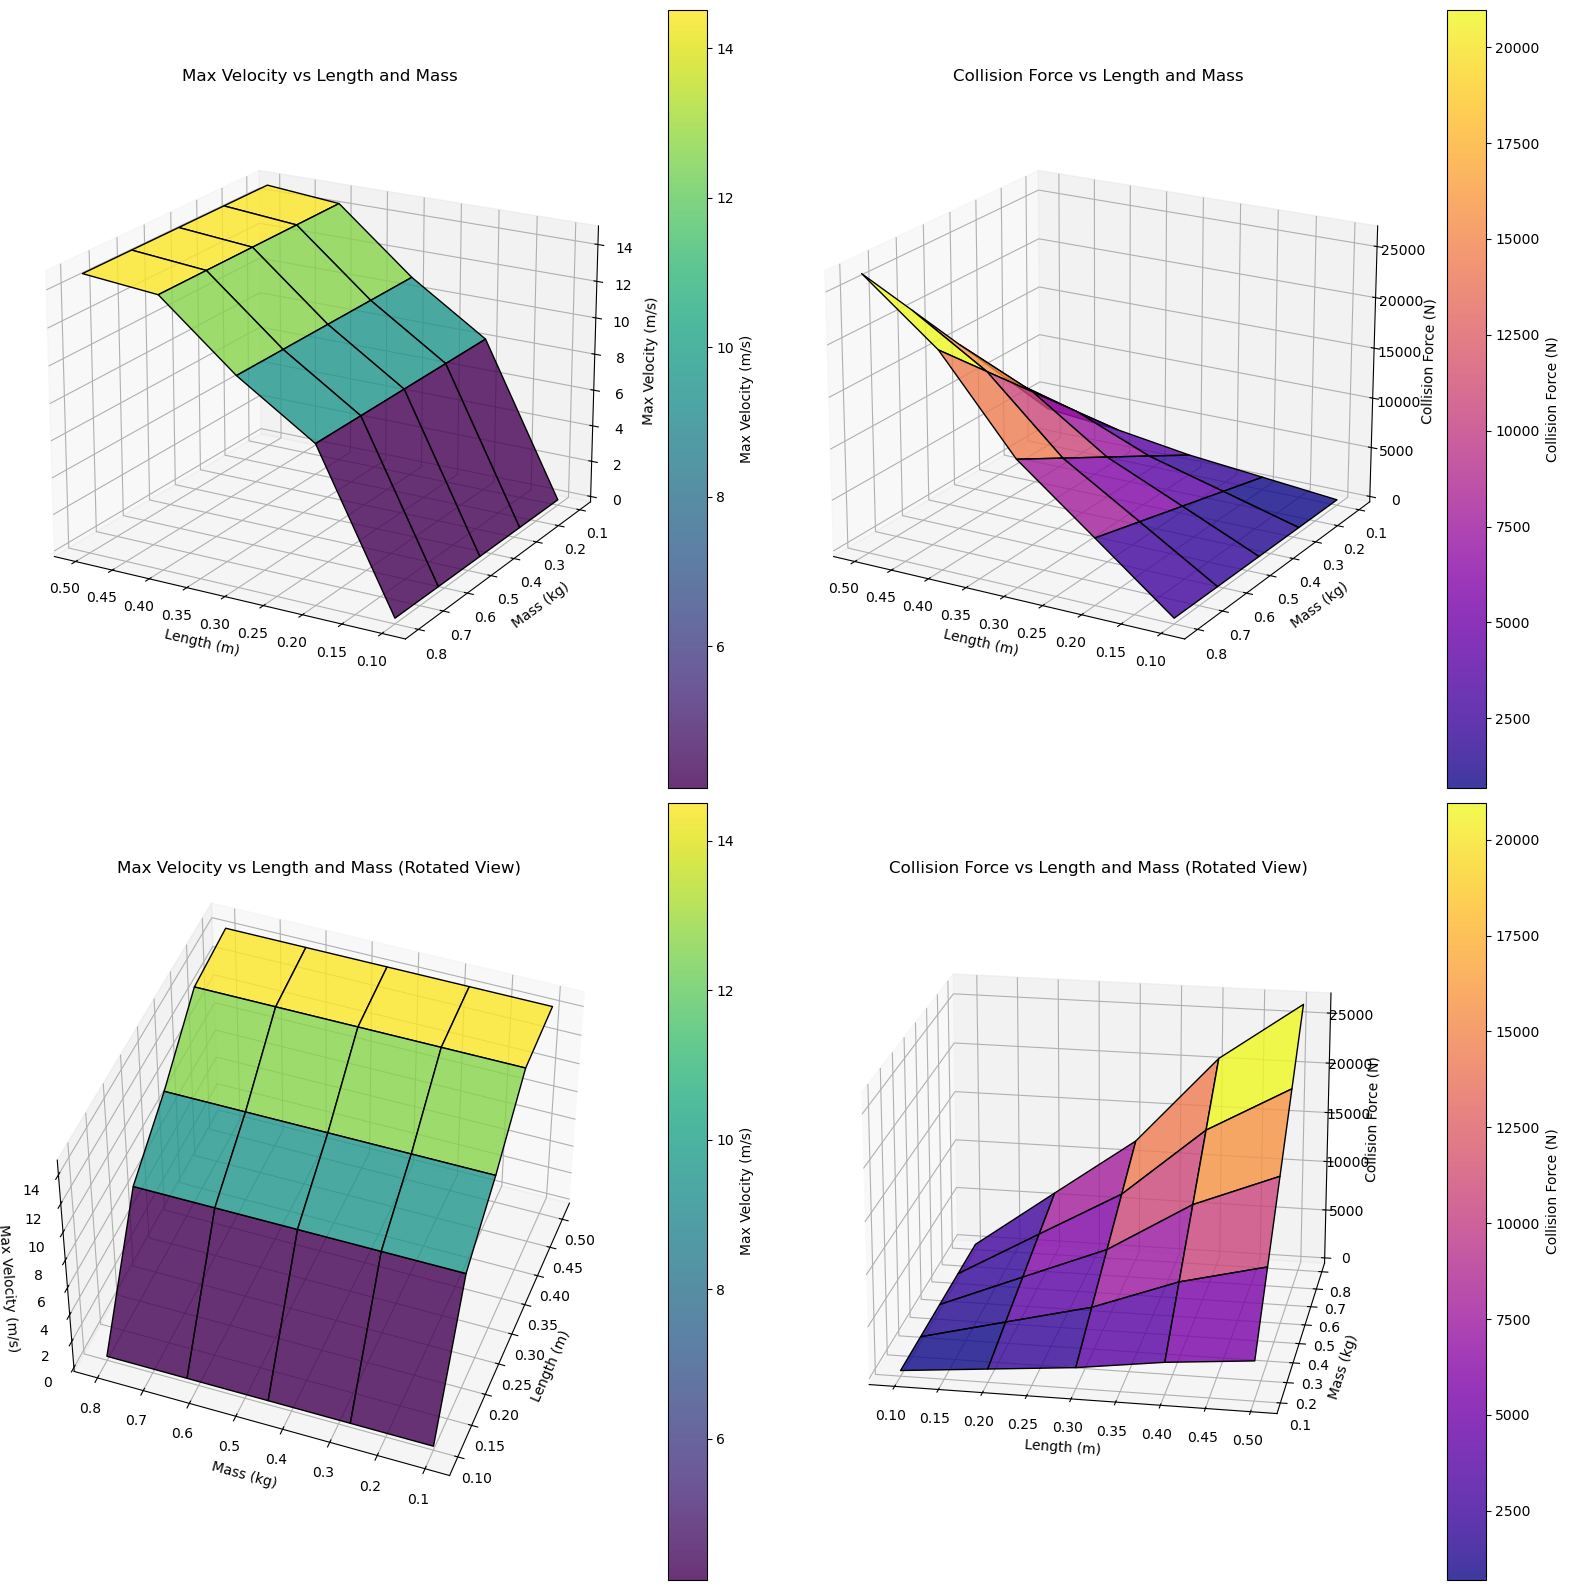

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dt = 0.001  # Time step for the simulation (seconds)
T = 1.0  # Total simulation time (seconds)
num_steps = int(T / dt)  # Number of simulation steps
theta1_0 = 3 * np.pi / 4  # Initial angle for pendulum 1 (radians)
theta2_0 = -3 * np.pi / 4  # Initial angle for pendulum 2 (radians)
initial_accelerations = np.linspace(50, max_acceleration, 20)  # Accelerations (m/s²)
m1, m2 = 0.4, 0.4  # Masses of the hands (kg)
e = 0.8  # Coefficient of restitution for collision
l = 0.25  # Length of the forearms (m)
d = 0.25  # Horizontal separation of the origins (m)

# Ranges for simulation parameters
masses = np.linspace(0.1, 0.8, 5)  # Masses in kilograms
lengths = np.linspace(0.1, 0.5, 5)  # Lengths in meters

# Function to simulate and find the maximum velocity and collision force
def simulate_pendulums(masses, lengths, initial_accelerations, num_steps, dt):
    results = []  # Store results for each configuration

    for mass in masses:
        for length in lengths:
            for acceleration in initial_accelerations:
                # Initialization
                omega1, omega2 = 0, 0
                theta1, theta2 = theta1_0, theta2_0
                collision_detected = False
                max_velocity = 0
                collision_force = 0

                for _ in range(num_steps):
                    # Angular accelerations
                    alpha1 = acceleration / length
                    alpha2 = -acceleration / length

                    # Update angular velocities
                    omega1 += alpha1 * dt
                    omega2 += alpha2 * dt

                    # Update angular positions
                    theta1 += omega1 * dt
                    theta2 += omega2 * dt

                    # Calculate positions
                    x1, y1 = d / 2 + length * np.sin(theta1), -length * np.cos(theta1)
                    x2, y2 = -d / 2 + length * np.sin(theta2), -length * np.cos(theta2)

                    # Compute separation
                    separation = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

                    # Detect collision
                    if not collision_detected and separation < 1e-2:
                        collision_detected = True

                        # Calculate velocities before collision
                        v1_initial = omega1 * length
                        v2_initial = omega2 * length

                        # Apply restitution to calculate final velocities
                        v1_final = ((mass - e * mass) * v1_initial + (1 + e) * mass * v2_initial) / (mass + mass)
                        v2_final = ((mass - e * mass) * v2_initial + (1 + e) * mass * v1_initial) / (mass + mass)

                        # Update angular velocities after collision
                        omega1 = v1_final / length
                        omega2 = v2_final / length

                        # Momentum change and collision force
                        delta_p1 = mass * length * (v1_final - v1_initial)
                        delta_p2 = mass * length * (v2_final - v2_initial)
                        delta_p_total = abs(delta_p1) + abs(delta_p2)
                        collision_duration = max(dt, 1e-4)  # Avoid division by zero
                        collision_force = delta_p_total / collision_duration

                        # Update maximum velocity
                        max_velocity = max(abs(v1_final), abs(v2_final))

                    # Stop if pendulums return to initial positions
                    if collision_detected and abs(theta1 - theta1_0) < 1e-2 and abs(theta2 - theta2_0) < 1e-2:
                        break

                # Append results
                results.append([mass, length, acceleration, max_velocity, collision_force])

    return np.array(results)

# Run the simulation
simulation_data = simulate_pendulums(masses, lengths, initial_accelerations, num_steps, dt)

# Extract grids for visualization
def calculate_grids(data, masses, lengths):
    mass_grid, length_grid = np.meshgrid(masses, lengths)
    velocity_grid = np.zeros_like(mass_grid)
    force_grid = np.zeros_like(mass_grid)

    for i, mass in enumerate(masses):
        for j, length in enumerate(lengths):
            relevant_data = data[(data[:, 0] == mass) & (data[:, 1] == length)]
            if len(relevant_data) > 0:
                avg_velocity = np.mean(relevant_data[:, 3])
                avg_force = np.mean(relevant_data[:, 4])
                velocity_grid[j, i] = avg_velocity
                force_grid[j, i] = avg_force

    return mass_grid, length_grid, velocity_grid, force_grid

# Calculate grids
mass_grid, length_grid, velocity_grid, force_grid = calculate_grids(simulation_data, masses, lengths)

# Plot the results
fig = plt.figure(figsize=(16, 16))

# Maximum Velocity Plot
ax1 = fig.add_subplot(221, projection='3d')
surface1 = ax1.plot_surface(length_grid, mass_grid, velocity_grid, cmap='viridis', edgecolor='k', alpha=0.8)
plt.colorbar(surface1, ax=ax1, label="Max Velocity (m/s)")
ax1.set_title("Max Velocity vs Length and Mass")
ax1.set_xlabel("Length (m)")
ax1.set_ylabel("Mass (kg)")
ax1.set_zlabel("Max Velocity (m/s)")
ax1.view_init(elev=20, azim=120)

# Collision Force Plot
ax2 = fig.add_subplot(222, projection='3d')
surface2 = ax2.plot_surface(length_grid, mass_grid, force_grid, cmap='plasma', edgecolor='k', alpha=0.8)
plt.colorbar(surface2, ax=ax2, label="Collision Force (N)")
ax2.set_title("Collision Force vs Length and Mass")
ax2.set_xlabel("Length (m)")
ax2.set_ylabel("Mass (kg)")
ax2.set_zlabel("Collision Force (N)")
ax2.view_init(elev=20, azim=120)

# Maximum Velocity Plot (Rotated View)
ax3 = fig.add_subplot(223, projection='3d')
surface3 = ax3.plot_surface(length_grid, mass_grid, velocity_grid, cmap='viridis', edgecolor='k', alpha=0.8)
plt.colorbar(surface3, ax=ax3, label="Max Velocity (m/s)")
ax3.set_title("Max Velocity vs Length and Mass (Rotated View)")
ax3.set_xlabel("Length (m)")
ax3.set_ylabel("Mass (kg)")
ax3.set_zlabel("Max Velocity (m/s)")
ax3.view_init(elev=45, azim=200)  

# Collision Force Plot (Rotated View)
ax4 = fig.add_subplot(224, projection='3d')
surface4 = ax4.plot_surface(length_grid, mass_grid, force_grid, cmap='plasma', edgecolor='k', alpha=0.8)
plt.colorbar(surface4, ax=ax4, label="Collision Force (N)")
ax4.set_title("Collision Force vs Length and Mass (Rotated View)")
ax4.set_xlabel("Length (m)")
ax4.set_ylabel("Mass (kg)")
ax4.set_zlabel("Collision Force (N)")
ax4.view_init(elev=20, azim=280) 

plt.tight_layout()
plt.show()


## Analysis of results
In this investigation, we aimed to explore the dynamics of a simple pendulum-like system modeling the motion of hands during a high-five. Specifically, we investigated the relationships between pendulum length, mass, acceleration, and their effects on maximum velocity and collision force.

We end up finding that for an average hand, the maximum velocity achieved is approximately 9.22 m/s. While this velocity may appear relatively slow, it’s important to consider the extremely high accelerations required to achieve this motion. These accelerations are far beyond what is humanly feasible meaning that unfortunately, it's not very likely that you'll be able to take down your enemies with a vicious high five.

From our 3D plots, we observe that mass does not significantly affect the maximum velocity. This aligns with the theoretical expectation since tangential velocity in pendulum motion depends primarily on the pendulum's length and angular motion, not its mass. However, the relationship between pendulum length and maximum velocity closely resembles a square root dependency. This can be seen in the plots where velocity increases with length but at a diminishing rate. In our second 3D plot, we see that length and mass are linearly proportional to the collision force. The dependency on length arises because a longer pendulum increases the tangential velocity, which in turn amplifies the momentum change during a collision. Similarly, the dependency on mass is due to the direct relationship between momentum. A higher mass results in a greater momentum change for a given velocity, thus leading to a higher collision force. From this we can conclude that heavier individuals with longer arms are more likely to be successful in delivering a damaging high five, however the chances of this are very very small.

## References
_(In addition to citations for any python packages used beyond our standard ones, list the sources for any data or literature cited in your project. Additionally, you must also cite the sources for any code that you found on the internet or from peers.)_

1. Araleh, A. Personal communication and informal feedback.

2. ChatGPT. Generated content based on user inputs. OpenAI.

3. International Research Council on Biomechanics of Injury (IRCOBI). (2012). *Understanding forces involved in human hand injuries*. Retrieved from [https://www.ircobi.org/wordpress/downloads/irc12/pdf_files/59.pdf](https://www.ircobi.org/wordpress/downloads/irc12/pdf_files/59.pdf)

4. Pappas, S. (2010, November 9). *How much force can a human punch generate?*. LiveScience. Retrieved from [https://www.livescience.com/6040-brute-force-humans-punch.html](https://www.livescience.com/6040-brute-force-humans-punch.html)

5. Pike, W. T., Coates, R. D., Sánchez-Lavega, A., Mischna, M. A., Spiga, A., ... (2023). Current Biology. Retrieved from [https://doi.org/10.1016/j.cub.2023.06.026](https://doi.org/10.1016/j.cub.2023.06.026])

6. USA Today. (2023, April 7). *Fastest pitch ever thrown in MLB and college baseball*. Retrieved from [https://www.usatoday.com/story/sports/mlb/2023/04/07/fastest-pitch-ever-thrown-mlb-college/11265071002/](https://www.usatoday.com/story/sports/mlb/2023/04/07/fastest-pitch-ever-thrown-mlb-college/11265071002/)

7. *The science of soccer.* (n.d.). University of Hong Kong. Retrieved from [https://www.physics.hku.hk/~phys1055/lectures/chap05.html#:~:text=For%20a%20typical%20soccer%20ball,by%2020%25%20after%20the%20impact.](https://www.physics.hku.hk/~phys1055/lectures/chap05.html#:~:text=For%20a%20typical%20soccer%20ball,by%2020%25%20after%20the%20impact.)

8. Wikipedia contributors. (n.d.). G-force. In Wikipedia. Retrieved November 19, 2024, from https://en.wikipedia.org/wiki/G-force#cite_note-Brulle-8

## Appendix 1: Code validation

### A1.1: Comparison of simulation results with by-hand calculations

By-hand calculations are included as a separate document. In this document, I use the relationship between force and impulse to solve for the expected velocity. While the velocity is not exactly the same as the simulated velocity, the two are reasonably close. I expect the values to vary a little due to the time steps used in the simulation. The finite timestep introduces a possibility for very very small errors that accumulate with each calculation.

### A1.2: Visualizing positions of pendulums
While it is most useful to our research question to analyze things like force and impulse, I also graphed the positions of the pendulums as I worked through my simulation. This enabled to keep track of where the pendulums were going, and if that made sense given the setup of my simulation. 
The first graph below provides a nice picture of the initial set up of the high-fivers, while the next two graphs show the x-y motion of the two hands over time. In this x-position graph, we see both hands heading towards each other in a periodic motion. In the y-position graph, we see both hands moving higher until the high five. After the high five, the hands decrease in high. It also makes sense that the y-position of both hands remain the same throughout the simulation, as motion should be symmetric across the y-axis.

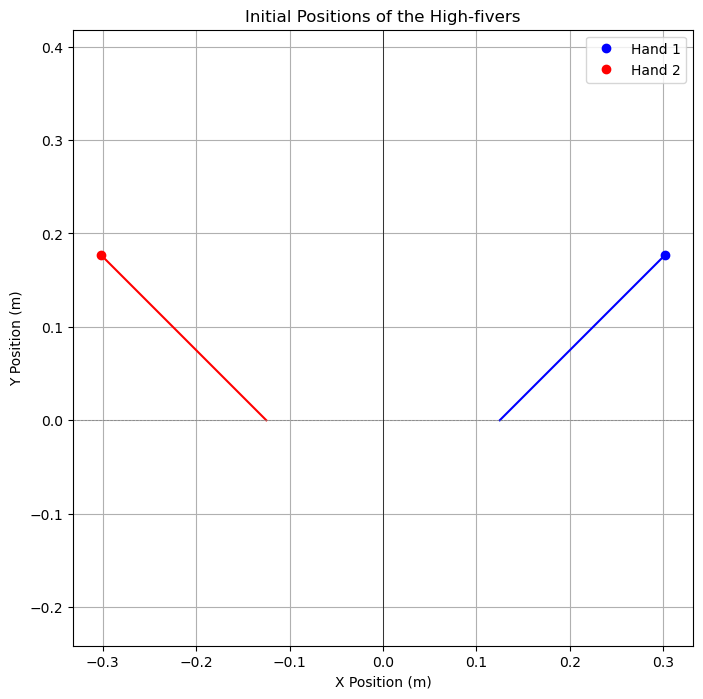

In [18]:
# Initial positions
x1_init = d / 2 + l * np.sin(theta1_0)
y1_init = -l * np.cos(theta1_0)
x2_init = -d / 2 + l * np.sin(theta2_0)
y2_init = -l * np.cos(theta2_0)

# Plot initial positions
plt.figure(figsize=(8, 8))
plt.plot([d / 2, x1_init], [0, y1_init], 'b-')
plt.plot([x1_init], [y1_init], 'bo', label="Hand 1")
plt.plot([-d / 2, x2_init], [0, y2_init], 'r-')
plt.plot([x2_init], [y2_init], 'ro', label="Hand 2")

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Ground line
plt.axvline(0, color='black', linestyle='-', linewidth=0.5)  # Y-axis

plt.title("Initial Positions of the High-fivers")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

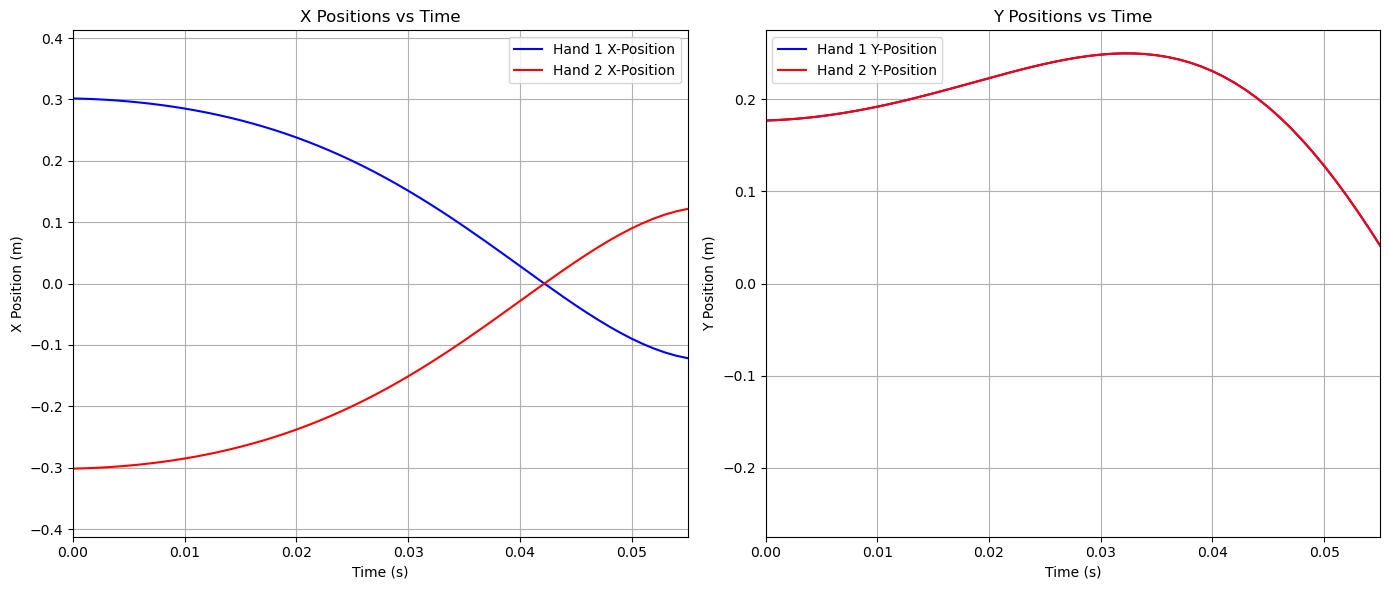

In [20]:
# Looping through each acceleration
for a0 in initial_accelerations:
    # Creating arrays for position and time
    x1_history = np.zeros(steps)
    y1_history = np.zeros(steps)
    x2_history = np.zeros(steps)
    y2_history = np.zeros(steps)
    time_history = np.zeros(steps)

    # Initialization
    omega1, omega2 = 0, 0  # Start with zero angular velocity
    theta1, theta2 = theta1_0, theta2_0
    collision_detected = False
    collision_force = 0  # Default value if no collision occurs
    max_velocity = 0  # Default value before a collision is detected

    # Simulation
    for step in range(steps):
        # Angular accelerations from tangential accelerations
        alpha1 = a0 / l
        alpha2 = -a0 / l

        # Update angular velocities and positions
        omega1 += alpha1 * dt
        omega2 += alpha2 * dt
        theta1 += omega1 * dt
        theta2 += omega2 * dt

        # Calculate positions
        x1 = d / 2 + l * np.sin(theta1)
        y1 = -l * np.cos(theta1)
        x2 = -d / 2 + l * np.sin(theta2)
        y2 = -l * np.cos(theta2)

        # Store positions in history
        x1_history[step] = x1
        y1_history[step] = y1
        x2_history[step] = x2
        y2_history[step] = y2
        time_history[step] = step * dt

        # Compute separation
        separation = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

        # Detect collision
        if not collision_detected and separation < 1e-2:
            collision_detected = True

            # Calculate velocities before collision
            v1_initial = omega1 * l
            v2_initial = omega2 * l

            # Apply restitution to calculate final velocities
            v1_final = ((m1 - e * m2) * v1_initial + (1 + e) * m2 * v2_initial) / (m1 + m2)
            v2_final = ((m2 - e * m1) * v2_initial + (1 + e) * m1 * v1_initial) / (m1 + m2)

            # Momentum changes
            delta_p1 = m1 * l * (v1_final - v1_initial)
            delta_p2 = m2 * l * (v2_final - v2_initial)

            # Net momentum change
            delta_p_total = abs(delta_p1) + abs(delta_p2)

            # Approximate collision force
            collision_duration = max(dt, 1e-4)  # Avoid division by zero
            collision_force = delta_p_total / collision_duration
            
            # Update maximum velocity
            max_velocity = max(abs(v1_initial), abs(v2_initial))

        # Stop when returning to initial positions
        if collision_detected and abs(theta1 - theta1_0) < tolerance and abs(theta2 - theta2_0) < tolerance:
            break

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot X positions vs time
axes[0].plot(time_history, x1_history, label="Hand 1 X-Position", color='blue')
axes[0].plot(time_history, x2_history, label="Hand 2 X-Position", color='red')
axes[0].set_title("X Positions vs Time")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("X Position (m)")
axes[0].set_xlim(0, 0.055)
axes[0].legend()
axes[0].grid()

# Plot Y positions vs time
axes[1].plot(time_history, y1_history, label="Hand 1 Y-Position", color='blue')
axes[1].plot(time_history, y2_history, label="Hand 2 Y-Position", color='red')
axes[1].set_title("Y Positions vs Time")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Y Position (m)")
axes[1].set_xlim(0, 0.055)
axes[1].legend()
axes[1].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Appendix 2: Reflection questions

### Reflection 1: Coding Approaches (A)
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, readable and/or concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project.)*

Initially, I wasn’t sure what the easiest way to get the code up and running would be. My first attempt involved modeling it as a flipped pendulum collision, but this made implementation difficult—especially when figuring out how to reference axes for angles. Instead, I decided to model the pendulums in their standard orientation, calculate their positions, and then simply flip the vertical values for the collision. This approach significantly simplified the setup and made it much easier to get the simulation working. One major struggle was deciding what constituted a sufficient depth of coding and physics for this project. I went through at least five different approaches to modeling the idea, creating and discarding several simulations when they didn’t work as intended. However, once I clarified my goals and decided on the right approach, coding became much easier.

### Reflection 2: Coding Approaches (B)
*(Highlight an aspect of your code that you feel you did particularily well. Discuss an aspect of your code that would benefit the most from further effort.)*

I am most proud of the progress I made with my high-five simulation. This part required significant effort, and was very gratifying when it worked! Also, I think that the code demonstrates a solid understanding of implementing Euler's method for numerical simulations and accurately detecting collisions. I am particularly proud of the 3D plots produced by my code, as creating them required revisiting how meshgrid works and understanding its critical role in 3D plotting. That said, I recognize that the simulations for varying masses and lengths could benefit from further refinement. To achieve this, I consulted with GenAI, which guided me through the process of implementing nested for loops to handle the parameter variations. While this approach works, there is definitely room for improvement. I'm not a big fan of nested for loops, and I feel that it's possible to code this portion in a much more legible way. Further, my biggest problem with my results is that the simulated velocity is not the same as my calculated velocity for the first simulation. While I acknowledge that it's not concering that the values are a little far off, I would like to improve the accuracy of my precision so that they are a bit closer in value.

### Reflection 3: Simulation phyiscs and investigation (A)
*(How well did you apply and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of.)*

In my simulation, I was able to use analogy to create a more accurate model of a high five. I believe that using pendulum motion provided logical and accurate motion, as it is a well-studied system. Additionally, I think I did a good job of describing the collision itself, acknowledging that the interaction is neither perfectly elastic nor perfectly inelastic and implementing a coefficient of restitution to represent the decrease in velocity after the collision. However, I am not entirely sure if the coefficient is the most accurate, as it is based on my own deduction that a hand shares similar properties with a soccer ball. This decision was subjective and may be flawed. I also think it was a good idea to analyze both the force and velocity upon impact. That said, when looking at the resulting graphs, the investigation feels like it could be more comprehensive. I say this because the analysis appears somewhat sparse, but I thought it would be best to keep it concise.

### Reflection 4: Simulation phyiscs and investigation (B)
*(Highlight something you feel you did particularily well in terms of the context of your simulation, the physical modelling that you did or the investigation you performed. Discuss an aspect of these dimensions of your project that would benefit the most from further effort.)*

I am happy that I was able to model a simulation in two dimensions. This required a bit of extra coding but wasn’t too much work. However, understanding the rotational movement aspect was a bit challenging for me. This is because I am currently taking PHYS 117 and am just beginning to learn about these topics. To be honest, I find rotational motion a little intimidating, but it was essential for analyzing how my system of high-fivers worked. I think I could have gone further by investigating the conservation of angular momentum. My focus was primarily on the change in momentum at the time of collision, and I avoided exploring conservation laws in detail. Since these aspects are crucial to many collisions, I think adding more investigation into conservation principles would be a valuable improvement.

### Reflection 5: Effectiveness of your communication
*(Highlight something you feel you did particularily well in your visualizations or written communication. Discuss an aspect of your visualizations or written communication that would benefit the most from further effort.)*

I feel that I did a good job communicating my work effectively. The visualizations I created clearly explain the behaviour of the most relevant variables while remaining tidy, organized, and easy to understand.
Additionally, I spent time refining the formatting of my Jupyter notebook. After doing some digging and chatting with peers, I implemented techniques to improve its readability, such as using tables to list constants and producing a clear flow of logic for my analysis. That said, I'm not sure whether my written explanation of the simulation is as clear and thorough as it could be. While I provided a general overview, I feel there is more to be said about the analysis of the results. For example, incorporating relevant formulas to support the observed relationships between variables could make the explanations more convincing and grounded in theoretical principles. This would not only enhance the reader's understanding but also reinforce the alignment between the simulation results and established physics concepts. I do have to say though that the presentation of the notebook is my proudest portion of the notebook.